In [276]:
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os   
import statsmodels.api as sm
from pandas import read_excel, DataFrame, merge, melt,concat,get_dummies
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from helper import my_logit,scailing,is_categorical,my_ols, independence_test, normality_test

In [277]:
df =read_excel("./한국복지패널_17차.xlsx")

In [278]:
colname = df.iloc[1]
df.columns = colname
df= df.drop(1)
df.reset_index(drop=True, inplace=True)

In [279]:
df

1,h17_pid,h17_id,h17_reg7,h17_din,new_h1701_2,new_h1701_3,new_h1701_4,new_h1701_5,new_h1701_6,new_h1703_4,...,wc17_30,wc17_39,new_h1703_5,h1707_3aq7,h1707_3aq8,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq2_2,h1707_3aq5_1
0,id,id,category,numeric,category,category,category,numeric,category,category,...,category,category,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
1,201,2,1,405,1,10,2,1945,4,9,...,0,0,0,5,63,15,3,8,80,15
2,301,3,1,2788,1,10,1,1948,3,2,...,0,0,0,2,23,2,46,2,65,24
3,401,4,1,2304,1,10,1,1942,7,3,...,0,0,0,5,17,5,18,16,43,21
4,601,6,1,5231,1,10,1,1962,6,1,...,2,2,0,13,24,13,53,11,118,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,1200701,12007,5,4963,1,10,1,1981,6,1,...,0,0,2,11,11,4,25,13,113,17
7862,1200801,12008,5,9182,1,10,1,1977,7,1,...,0,0,0,6,32,35,61,17,152,19
7863,1200901,12009,5,8548,1,10,1,1976,7,5,...,0,0,2,21,50,2,36,16,131,18
7864,1201001,12010,2,8452,1,10,1,1975,7,1,...,0,0,1,13,5,5,20,10,130,16


In [280]:
numeric_columns = [col for col in df.columns if df.iloc[0][col] == 'numeric']
numeric_data = {col: df[col] for col in numeric_columns}
numeric_df = pd.DataFrame(numeric_data)
numeric_df = numeric_df.drop(0)

In [281]:
numeric_df

,h17_din,new_h1701_5,h1706_6,h1707_3aq9,h1707_3aq10,new_h1703_5,h1707_3aq7,h1707_3aq8,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq2_2,h1707_3aq5_1
1,405,1945,100000,0,0,0,5,63,15,3,8,80,15
2,2788,1948,500,0,0,0,2,23,2,46,2,65,24
3,2304,1942,40000,0,0,0,5,17,5,18,16,43,21
4,5231,1962,70000,6,137,0,13,24,13,53,11,118,37
5,1192,1940,0,0,0,0,2,14,1,1,3,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,4963,1981,27000,0,0,2,11,11,4,25,13,113,17
7862,9182,1977,80000,4,140,0,6,32,35,61,17,152,19
7863,8548,1976,70000,2,60,2,21,50,2,36,16,131,18
7864,8452,1975,30000,0,30,1,13,5,5,20,10,130,16


In [282]:
numeric_df1 =numeric_df.rename(columns= 
{'h17_din':'disposable_income',
'new_h1701_5':"age",
"h1706_6":"house_price",
"h1707_3aq9":"pub_edu",
"h1707_3aq10":"priv_edu",
"new_h1703_5":"num_of_child",
"h1707_3aq2_2": "meal_out",
"h1707_3aq5_1": "utility_bills",
"h1707_3aq7": "apparel",
"h1707_3aq8": "insurance",
"h1707_3aq11":"entertainment",
"h1707_5aq3":"transportation",
"h1707_5aq4":"phone"})
numeric_df1[numeric_df1.columns] = numeric_df1[numeric_df1.columns].astype('int')
numeric_df1

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,apparel,insurance,entertainment,transportation,phone,meal_out,utility_bills
1,405,1945,100000,0,0,0,5,63,15,3,8,80,15
2,2788,1948,500,0,0,0,2,23,2,46,2,65,24
3,2304,1942,40000,0,0,0,5,17,5,18,16,43,21
4,5231,1962,70000,6,137,0,13,24,13,53,11,118,37
5,1192,1940,0,0,0,0,2,14,1,1,3,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,4963,1981,27000,0,0,2,11,11,4,25,13,113,17
7862,9182,1977,80000,4,140,0,6,32,35,61,17,152,19
7863,8548,1976,70000,2,60,2,21,50,2,36,16,131,18
7864,8452,1975,30000,0,30,1,13,5,5,20,10,130,16


#### 나이 컬럼 출생년도에서 2022년 기준 나이로 변환

In [283]:
numeric_df1['age'] = pd.Series([2022] * (len(numeric_df)-1)) - numeric_df1['age']

In [284]:
(numeric_df1==0).sum()

disposable_income       0
age                     0
house_price          1081
pub_edu              7002
priv_edu             6807
num_of_child         6409
apparel              5846
insurance            5627
entertainment        5816
transportation       5650
phone                5552
meal_out             5536
utility_bills        5537
dtype: int64

#### 0~17세 이하의 자녀가 있는 경우만을 고려

In [285]:
edf = numeric_df1[(numeric_df1['num_of_child'] != 0)]

In [286]:
for col in edf.columns:
    outlier =np.percentile(edf[col], 75) - np.percentile(edf[col],25)
    mean = edf[col].mean()
    std = edf[col].std()
    
    for index, value in enumerate(edf[col]):
        z_score = (value - mean) / std
        if abs(z_score) > outlier:
            edf.loc[index, col] = None  # Replace outlier with NaN

print(edf)

      disposable_income   age  house_price  pub_edu  priv_edu  num_of_child  \
9                5958.0  44.0      21000.0     88.0      67.0           1.0   
15               1969.0  61.0      25000.0      0.0       0.0           1.0   
16               3406.0  38.0     100000.0      0.0       0.0           1.0   
19               7586.0  50.0      17000.0      3.0      10.0           2.0   
25               4494.0  46.0       2500.0      0.0      42.0           2.0   
...                 ...   ...          ...      ...       ...           ...   
1372                NaN   NaN          NaN      NaN       NaN           NaN   
1403                NaN   NaN          NaN      NaN       NaN           NaN   
1421                NaN   NaN          NaN      NaN       NaN           NaN   
1424                NaN   NaN          NaN      NaN       NaN           NaN   
1428                NaN   NaN          NaN      NaN       NaN           NaN   

      apparel  insurance  entertainment  transporta

C:\Users\yis82\AppData\Local\Temp\ipykernel_11524\4073754640.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf.loc[index, col] = None  # Replace outlier with NaN


In [287]:
edf.dropna(axis=0,inplace  = True)

In [288]:
(edf == 0).sum()

disposable_income       0
age                     0
house_price           106
pub_edu              1038
priv_edu              608
num_of_child            0
apparel              1183
insurance            1185
entertainment        1194
transportation       1183
phone                1180
meal_out             1180
utility_bills        1180
dtype: int64

#### 결측치 제거

In [289]:
edf = edf[~(edf == 0).any(axis=1)]
edf

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,apparel,insurance,entertainment,transportation,phone,meal_out,utility_bills
9,5958.0,44.0,21000.0,88.0,67.0,1.0,17.0,34.0,20.0,51.0,25.0,120.0,33.0
19,7586.0,50.0,17000.0,3.0,10.0,2.0,45.0,20.0,27.0,26.0,19.0,118.0,18.0
31,9504.0,49.0,70000.0,19.0,325.0,1.0,28.0,37.0,43.0,50.0,15.0,135.0,11.0
56,4987.0,51.0,570.0,42.0,9.0,1.0,2.0,31.0,14.0,31.0,18.0,111.0,18.0
75,5787.0,53.0,10000.0,5.0,132.0,2.0,9.0,8.0,33.0,45.0,21.0,180.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,10937.0,51.0,60000.0,5.0,220.0,1.0,22.0,58.0,16.0,82.0,37.0,136.0,17.0
7840,9566.0,45.0,70000.0,2.0,180.0,2.0,25.0,7.0,17.0,51.0,12.0,104.0,14.0
7856,7742.0,38.0,10000.0,1.0,89.0,2.0,11.0,24.0,46.0,22.0,12.0,123.0,16.0
7860,12027.0,45.0,25000.0,3.0,73.0,1.0,30.0,57.0,8.0,354.0,26.0,135.0,13.0


In [290]:
categorical_columns = [col for col in df.columns if df.iloc[0][col] == 'category']
categorical_columns
categorical_data = {col: df[col] for col in categorical_columns}
category_df = pd.DataFrame(categorical_data)
category_df= category_df.drop(0)
category_df

,h17_reg7,new_h1701_2,new_h1701_3,new_h1701_4,new_h1701_6,new_h1703_4,h1706_1,p1703_6,p1703_7,p1703_8,p1703_9,p1703_12,wc17_8aq6,wc17_8aq8,wc17_8,wc17_29,wc17_30,wc17_39
1,1,1,10,2,4,9,2,1,3,3,2,1,0,0,0,0,0,0
2,1,1,10,1,3,2,2,4,4,4,4,4,0,0,0,0,0,0
3,1,1,10,1,7,3,1,2,5,2,4,4,0,0,0,0,0,0
4,1,1,10,1,6,1,2,3,4,5,4,4,4,4,2,2,2,2
5,2,1,10,2,3,4,5,2,3,2,3,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,5,1,10,1,6,1,5,4,4,4,4,4,0,0,0,0,0,0
7862,5,1,10,1,7,1,5,4,4,4,4,4,0,0,0,0,0,0
7863,5,1,10,1,7,5,5,4,4,4,4,4,0,0,0,0,0,0
7864,2,1,10,1,7,1,5,3,4,4,4,4,0,0,0,0,0,0


In [291]:
category_df[category_df.columns] = category_df[category_df.columns].astype('category')
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 1 to 7865
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   h17_reg7     7865 non-null   category
 1   new_h1701_2  7865 non-null   category
 2   new_h1701_3  7865 non-null   category
 3   new_h1701_4  7865 non-null   category
 4   new_h1701_6  7865 non-null   category
 5   new_h1703_4  7865 non-null   category
 6   h1706_1      7865 non-null   category
 7   p1703_6      7865 non-null   category
 8   p1703_7      7865 non-null   category
 9   p1703_8      7865 non-null   category
 10  p1703_9      7865 non-null   category
 11  p1703_12     7865 non-null   category
 12  wc17_8aq6    7865 non-null   category
 13  wc17_8aq8    7865 non-null   category
 14  wc17_8       7865 non-null   category
 15  wc17_29      7865 non-null   category
 16  wc17_30      7865 non-null   category
 17  wc17_39      7865 non-null   category
dtypes: category(18)
memory usage

#### 결측치 확인

In [292]:
(category_df==0).sum()

h17_reg7          0
new_h1701_2       0
new_h1701_3       0
new_h1701_4       0
new_h1701_6       0
new_h1703_4       0
h1706_1           0
p1703_6         310
p1703_7         310
p1703_8         310
p1703_9         310
p1703_12        310
wc17_8aq6      6330
wc17_8aq8      6330
wc17_8         6330
wc17_29        6330
wc17_30        6330
wc17_39        6330
dtype: int64

##### wc 카테고리들은 결측치가 데이터의 20%보다 많기 떄문에 변수로서 의미가 없다고 판단하여 삭제한다.
##### 또한 결측치 행들도 삭제

In [293]:
category_df = category_df.drop(["wc17_8aq6","wc17_8aq8","wc17_8", "wc17_29","wc17_30","wc17_39"],axis=1)
category_df = category_df[~(category_df == 0).any(axis=1)]


(category_df==0).sum()

h17_reg7       0
new_h1701_2    0
new_h1701_3    0
new_h1701_4    0
new_h1701_6    0
new_h1703_4    0
h1706_1        0
p1703_6        0
p1703_7        0
p1703_8        0
p1703_9        0
p1703_12       0
dtype: int64

#### 범주형 변수 단순화 작업

#### 7개 권역별 지역구분

- 기존 분류 기준 
    1. 서울          2. 수도권(인천/경기)    3. 부산/경남/울산   4.대구/경북   
    5. 대전/충남/세종   6. 강원/충북               7.광주/전남/전북/제주도\

- 재분류 기준

    1, 2 >>> 1(수도권)
    
    3,4,5,6,7 >>>> 2(비수도권) 

In [294]:
district = DataFrame(category_df['h17_reg7'])
district = district.reset_index(drop=True)
district['h17_reg7'] = district['h17_reg7'].cat.set_categories(district['h17_reg7'].cat.categories)
district['h17_reg7'] = district['h17_reg7'].replace([1,2], 1)
district['h17_reg7'] = district['h17_reg7'].replace([3,4,5,6,7], 2)
district.rename(columns={'h17_reg7':'area'},inplace=True)
district

,area
0,1
1,1
2,1
3,1
4,1
...,...
7550,2
7551,2
7552,2
7553,1


#### 주택 유형

기존 주택 유형
|주택 유형|   |
|---|---|
1.일반단독주택       | 7.점포주택 등 복합용도 주택
2.다가구용 단독주택 |8.비거주용 건물 내 주택(상가,공장 등)
3.다세대주택        | 9.오피스텔
4.연립주택(빌라)   |10.비닐하우스, 움막, 판잣집
5.일반아파트        |11.임시가건물(컨테이너, 재개발지역 가이주단지 포함)
6.영구임대아파트   |12. 기타  
|13. 국민공공임대아파트"|
--------------------------------------------------------------------------

|재분류 후 주택 유형||
|---|---|
|1,2,3,4,9| 1. 일반 주택|
|5,7,8|2. 아파트|
|6,10,11,12|3. 복지 주택|

In [295]:
house_type = DataFrame(category_df['h1706_1'])
house_type = house_type.reset_index(drop=True)
house_type['h1706_1'] = house_type['h1706_1'].cat.set_categories(house_type['h1706_1'].cat.categories)
house_type['h1706_1'] = house_type['h1706_1'].replace([1,2,3,4,9], 1)
house_type['h1706_1'] = house_type['h1706_1'].replace([5,7,8], 2)
house_type['h1706_1'] = house_type['h1706_1'].replace([6,10,11,12,13], 3)
house_type.rename(columns={'h1706_1':'house_type'},inplace=True)
house_type

,house_type
0,1
1,1
2,1
3,1
4,2
...,...
7550,2
7551,2
7552,2
7553,2


경제활동 참여상태 재분류

- 1,5,6 비임금 종사자(1)
- 2,3,4 임시 근로자(2)
- 7,8,9 종신 근로자(3)


In [296]:
employee_type = DataFrame(category_df['new_h1703_4'])
employee_type = employee_type.reset_index(drop=True)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].cat.set_categories(employee_type['new_h1703_4'].cat.categories)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([1,5,6], 3)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([2,3,4], 2)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([7,8,9,], 1)
employee_type.rename(columns ={'new_h1703_4':'employee_type'},inplace=True)
employee_type

,employee_type
0,1
1,2
2,2
3,2
4,2
...,...
7550,2
7551,2
7552,2
7553,2


In [297]:
education_level = DataFrame(category_df['new_h1701_6'])
education_level = education_level.reset_index(drop=True)
education_level['new_h1701_6'] = education_level['new_h1701_6'].astype('category')
education_level['new_h1701_6'] = education_level['new_h1701_6'].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9])
education_level['new_h1701_6'] = education_level['new_h1701_6'].replace([1, 2, 3, 4, 5], 1)
education_level['new_h1701_6'] = education_level['new_h1701_6'].replace([6, 7, 8, 9], 2)
education_level.rename(columns={'new_h1701_6':'education_level'},inplace=True)
education_level

,education_level
0,1
1,1
2,2
3,2
4,1
...,...
7550,2
7551,2
7552,2
7553,2


[1,2] >> 불만족
3 >> 보통
[4,5] >> 만족

In [298]:
def variable_maker(nameOfcolumn,colname,myname):
    nameOfcolumn = DataFrame(category_df[colname])
    nameOfcolumn = nameOfcolumn.reset_index(drop=True)
    nameOfcolumn[colname] = nameOfcolumn[colname].cat.set_categories(nameOfcolumn[colname].cat.categories)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([1,2],1)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([3],2)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([4,5],3)
    nameOfcolumn.rename(columns={colname:myname},inplace = True)
    return nameOfcolumn

In [299]:
income_sat = variable_maker('income_sat','p1703_6','income_sat')
residential_sat= variable_maker('residential_sat',"p1703_7",'residential_sat')
family_sat = variable_maker('family_sat','p1703_8','family_sat')
job_sat = variable_maker('job_sat','p1703_9','job_sat')
general_sat = variable_maker('geneal_sat','p1703_12','general_sat')


In [300]:
new_cat_df = concat([house_type,employee_type,education_level,income_sat,residential_sat,family_sat,job_sat,general_sat],axis=1)
cat_df=get_dummies(new_cat_df,dtype=int)
cat_df = cat_df.drop(['income_sat_0',"residential_sat_0","family_sat_0","job_sat_0",'general_sat_0'],axis=1)

#### 연구 내용
 ##### 가설 1) 가구주의 유복한 성장 과정이 사교육비에 긍정적인 영향을 끼친다.

 사용할 변수
 |변수 이름|설명|
 |---|---|
 |부모의 교육수준|교육수준 1~5=고졸이하(1) 6,7,8,9 대졸이상(2)|
 |직업 만족도|1 불만족, 2보통, 3만족|
 |주된 경제활동 참여상태| 1. 비임금 종사자, 2. 임시 근로자, 3. 종신 근로자|
 |가처분소득| 처분 가능한 소득|

#### 부모의 교육수준에 따른 사교육비 지출 확인

In [301]:
edu=concat([education_level,edf['priv_edu']],axis=1)
edu=edu.query('priv_edu>0')
edu.groupby('education_level').mean()

,priv_edu
education_level,
1,82.222222
2,72.454545


In [302]:
employee = concat([employee_type,edf['priv_edu']], axis=1)
employee = employee.query('priv_edu>0')
employee.groupby('employee_type').mean()

,priv_edu
employee_type,
2,87.375
1,70.875


In [303]:
job = concat([job_sat,edf['priv_edu']],axis=1)
job = job.query('priv_edu > 0')
job.groupby('job_sat').mean()

,priv_edu
job_sat,
0,NaN
1,60.875000
2,55.785714
3,94.970588


In [304]:
from scipy.stats import skew, kurtosis

가처분소득 데이터가 정규성을 따르지 않기 떄문에 log 변환을 하여 정규성을 따르는 데이터로 변환을 하였다.

In [305]:
log_edf = np.log(edf)

(array([ 5., 10., 12., 23.,  7.,  6.,  2.,  1.,  0.,  1.]),
 array([ 8.0783781 ,  8.32630629,  8.57423448,  8.82216267,  9.07009086,
         9.31801905,  9.56594724,  9.81387542, 10.06180361, 10.3097318 ,
        10.55765999]),
 <BarContainer object of 10 artists>)

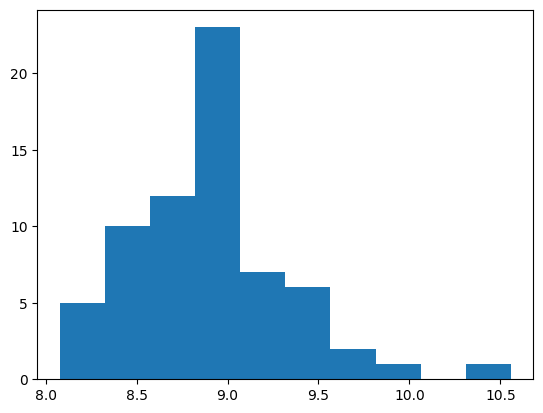

In [306]:
plt.hist(data=log_edf,x='disposable_income',bins=10)

In [307]:
sk = skew(log_edf['disposable_income'])
kr = kurtosis(log_edf['disposable_income'])
print(sk,kr)

0.9638109975736807 2.032814866771786


#### 사교육비 데이터 역시 정규성을 따르지 않기 때문에 log변환을 해주었다.

In [308]:
sk = skew(log_edf['priv_edu'])
kr = kurtosis(log_edf['priv_edu'])
print(sk,kr)

-0.8904720909214353 1.4495114276670735


두 데이터 모두왜도의 절대값이 3 미만이며, 첨도가 8미만이기 때문에 가처분소득 데이터가 정규성을 따른다고 판단할 수 있다.

In [309]:
cat_df1 = concat([employee_type,job_sat,education_level],axis=1)
cat_df1=get_dummies((cat_df1),dtype=int).drop('job_sat_0',axis=1)
cat_df1

,employee_type_2,employee_type_1,job_sat_1,job_sat_2,job_sat_3,education_level_1,education_level_2
0,0,1,1,0,0,1,0
1,1,0,0,0,1,1,0
2,1,0,0,0,1,0,1
3,1,0,0,0,1,0,1
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
7550,1,0,0,0,1,0,1
7551,1,0,0,0,1,0,1
7552,1,0,0,0,1,0,1
7553,1,0,0,0,1,0,1


In [310]:
test_df1 = concat([cat_df1,log_edf['priv_edu'],log_edf['disposable_income']],axis=1)
test_df1 =test_df1.dropna()
test_df1.head()

,employee_type_2,employee_type_1,job_sat_1,job_sat_2,job_sat_3,education_level_1,education_level_2,priv_edu,disposable_income
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.204693,8.692490
19,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.302585,8.934060
31,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5.783825,9.159468
56,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.197225,8.514590
75,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.882802,8.663369


In [311]:
from sklearn.linear_model import LinearRegression

In [312]:
X_train, X_test, y_train, y_test = train_test_split(test_df1.drop('priv_edu',axis=1), test_df1['priv_edu'], test_size=0.2, random_state=42)
model = LinearRegression()
y_pred = model.fit(X_train,y_train).predict(test_df1.drop('priv_edu',axis=1))

In [313]:
model =ols('priv_edu~disposable_income+education_level_1+education_level_2+employee_type_1+employee_type_2+job_sat_1+job_sat_2+job_sat_3',data=test_df1)
fit = model.fit()
fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     4.290
Date:                Tue, 22 Aug 2023   Prob (F-statistic):            0.00252
Time:                        15:08:12   Log-Likelihood:                -62.706
No. Observations:                  56   AIC:                             137.4
Df Residuals:                      50   BIC:                             149.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.2837      0.932     -2.451      0.018      -4.155      -0.412
disposable_income     1.0483      0.246      4.268      0.000       0.555       1.542
education_level_1    -1.0706      0.478     -2.240      0.030      -2.031      -0.111
education_level_2    -1.2131      0.493     -2.461      0.017      -2.203      -0.223
employee_type_1      -1.1114      0.477     -2.329      0.024      -2.070      -0.153
employee_type_2      -1.1723      0.483     -2.430      0.019      -2.141      -0.203
job_sat_1            -0.7686      0.377     -2.038      0.047      -1.526      -0.011
job_sat_2            -0.8987      0.341     -2.633      0.011      -1.584      -0.213
job_sat_3            -0.6165      0.359     -1.718      0.092      -1.337       0.104
==============================================================================
Omnibus:                        6.992   Durbin-Watson:                   2.426
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.246
Skew:                          -0.794   Prob(JB):                       0.0440
Kurtosis:                       3.392   Cond. No.                     1.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


$$
 \text{사교육비} = 0.086 + 0.445 \times \text{employee\_type\_1}+0.419\times \text{employee\_type\_2}+ \text{employee\_type\_3} \\
+ 3.127 \times \text{education\_level\_1} + 0.2703 \times \text{education\_level\_2}+ 0.437 \times \text{job\_sat\_1} + 0.386 \times \text{job\_sat\_2} +  0.508 \times \text{job\_sat\_3} \\
+  2.841\times \text{가처분소득} + \epsilon
$$

해석:
- $0.086$: 모든 더미 변수가 0(직원 유형, 교육 수준, 직무 만족도에 상관없이)이고 로그 가처분소득이 0일 때의 예상 로그 사교육비입니다.
- $ 0.445$: 가구주가 비임금 종사자(employee_type_1)에 속할 때  사교육비의 변화량을 나타냅니다.
- $0.419$: 가구주가 임시 근로자(employee_type_2)에 속할 때 사교육비의 변화량을 나타냅니다.
- $1$: 가구주가 종신 근로자(employee_type_3)에 속할 때 사교육비의 변화량을 나타냅니다.
- $3.127$: 가구주의 최종 학력이 고졸 이하(education_level_1)일 때 사교육비의 변화량을 나타냅니다.
- $0.2703$: 가구주의 최종 학력이 대졸 이상(education_level_2)일 때 사교육비의 변화량을 나타냅니다.
- $ 0.437$: 직무 만족도가 불만족(job_sat_1)일 때 사교육비의 변화량을 나타냅니다.
- $0.386 $: 직무 만족도가 보통(job_sat_2)일 때 사교육비의 변화량을 나타냅니다.
- $0.508$ : 직무 만족도가 만족(job_sat_3)일 때  사교육비의 변화량을 나타냅니다.
- $2.841$:  가처분소득이 1 증가할 때 평균적으로 변화하는  사교육비의 변화량을 나타냅니다.
- $\epsilon$: 오차를 나타냅니다.




F-statistics p-value가 유의수준인 0.05보다 작기 때문에 변수들이 사교육비의 변화량을 설명한다고 판단할 수 있다. 또한, 직업 만족도 만족 항목을 제외하고 전부 유의수준 0.05보다 작기 때문에 식이 유의하다고 주장할 수 있다.

In [314]:
xdf1 = test_df1.drop('priv_edu',axis=1)
xdf1

,employee_type_2,employee_type_1,job_sat_1,job_sat_2,job_sat_3,education_level_1,education_level_2,disposable_income
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.692490
19,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.934060
31,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.159468
56,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.514590
75,1.0,0.0,0.0,0.0,1.0,1.0,0.0,8.663369
82,0.0,1.0,1.0,0.0,0.0,1.0,0.0,8.828641
99,1.0,0.0,0.0,0.0,1.0,0.0,1.0,10.557660
103,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.038959
107,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.024854
108,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.893573


In [315]:
test_df1.head()

,employee_type_2,employee_type_1,job_sat_1,job_sat_2,job_sat_3,education_level_1,education_level_2,priv_edu,disposable_income
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.204693,8.692490
19,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.302585,8.934060
31,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5.783825,9.159468
56,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.197225,8.514590
75,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.882802,8.663369


#### 실제 값과 예상 결과를 재배치

In [316]:
rdf = DataFrame({'log_dis_income':test_df1['disposable_income'],'log_priv_edu' :test_df1['priv_edu'],'fitted_values': y_pred})
mdf = melt(rdf, id_vars=['log_dis_income'], value_vars=['log_priv_edu', 'fitted_values'])
print(mdf)

     log_dis_income       variable     value
0          8.692490   log_priv_edu  4.204693
1          8.934060   log_priv_edu  2.302585
2          9.159468   log_priv_edu  5.783825
3          8.514590   log_priv_edu  2.197225
4          8.663369   log_priv_edu  4.882802
..              ...            ...       ...
107        8.547722  fitted_values  3.864377
108        8.262301  fitted_values  3.437771
109        8.430763  fitted_values  3.610756
110        8.078378  fitted_values  3.768352
111        8.505525  fitted_values  3.968729

[112 rows x 3 columns]


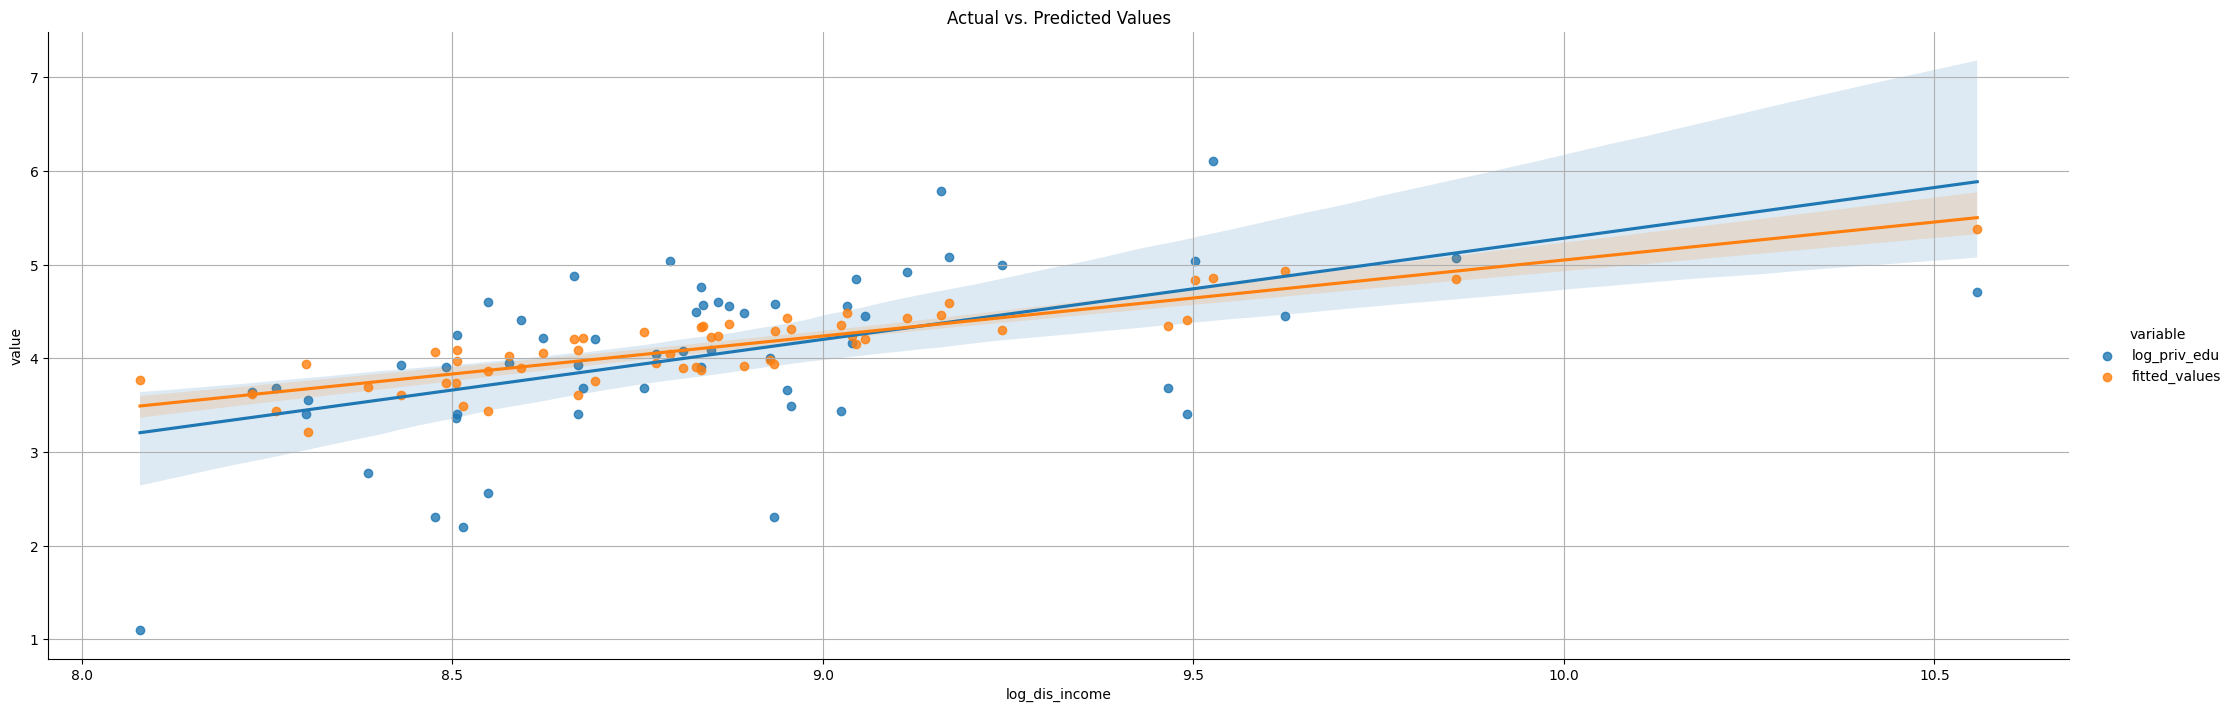

In [317]:
sb.lmplot(data=mdf, x="log_dis_income", y="value", hue="variable", height=7, aspect=3)
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()
plt.show()
plt.close()

##### 가설 2) 부유한 가정 환경이(긍정적 경제 상태) 사교육비 지출과 양의 상관관계를 갖는다.

 사용할 변수
 |변수 이름|설명|
 |---|---|
 |7개 권여별 지역 구분|1. 수도권 2. 비수도권|
 |주택 유형|1.일반 주택 2. 아파트 3. 복지 주거시설|
 |집 값| 집의 가격(만원)|
 |생활 만족도((나)가족의 수입 만족도, (다)주거 환경 만족도,(아)전반적 만족도)| 1. 불만족, 2.보통, 3. 만족||
 |가처분 소득| 단위 (만원)|
 |식료품비|	 단위 (만원)|
 |주거-관리비-합|	 단위 (만원)|
 광열수도비-합| 단위 (만원)|
 피복신발비	| 단위 (만원)|
 보건의료비	| 단위 (만원)|
 교양오락비	| 단위 (만원)|
 교통비	| 단위 (만원)|
 통신비| 단위 (만원)|


In [318]:
a=concat([district,edf['priv_edu']],axis=1)
a=a.query('priv_edu>0')
a.groupby('area').mean()

,priv_edu
area,
1,91.428571
2,73.628571


In [319]:
categorical_columns = concat(
    [district, house_type, residential_sat, family_sat, general_sat],
    axis=1,
)

categorical_columns_filtered = categorical_columns.loc[~(categorical_columns == 0).all(axis=1)]
categorical_dummies = get_dummies(categorical_columns, dtype=int)
categorical_dummies=categorical_dummies.drop(['residential_sat_0','family_sat_0','general_sat_0'],axis=1)

In [320]:
columns_to_concat = [
    log_edf['apparel'],
    log_edf['insurance'],
    log_edf['entertainment'],
    log_edf['transportation'],
    log_edf['phone'],
    log_edf['meal_out'],
    log_edf['utility_bills'],
   log_edf ['priv_edu'],
    log_edf['house_price'],
    log_edf['disposable_income'],
    categorical_dummies
]

xdf = pd.concat(columns_to_concat, axis=1)


In [321]:
xdf= xdf.dropna()
xdf.columns

Index(['apparel', 'insurance', 'entertainment', 'transportation', 'phone',
       'meal_out', 'utility_bills', 'priv_edu', 'house_price',
       'disposable_income', 'area_1', 'area_2', 'house_type_1', 'house_type_2',
       'house_type_3', 'residential_sat_1', 'residential_sat_2',
       'residential_sat_3', 'family_sat_1', 'family_sat_2', 'family_sat_3',
       'general_sat_1', 'general_sat_2', 'general_sat_3'],
      dtype='object')

## 다중 회귀 분석

In [322]:
model = my_ols(xdf, 'priv_edu',['apparel', 'insurance', 'entertainment', 'transportation', 'phone',
       'meal_out', 'utility_bills', 'house_price',
       'disposable_income', 'area_1', 'area_2', 'house_type_1', 'house_type_2',
       'house_type_3', 'residential_sat_1', 'residential_sat_2',
       'residential_sat_3', 'family_sat_1', 'family_sat_2', 'family_sat_3',
       'general_sat_1', 'general_sat_2', 'general_sat_3'])
model.summary

['apparel', 'insurance', 'entertainment', 'transportation', 'phone', 'meal_out', 'utility_bills', 'priv_edu', 'house_price', 'disposable_income', 'area_1', 'area_2', 'house_type_1', 'house_type_2', 'house_type_3', 'residential_sat_1', 'residential_sat_2', 'residential_sat_3', 'family_sat_1', 'family_sat_2', 'family_sat_3', 'general_sat_1', 'general_sat_2', 'general_sat_3']


C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2.729
Date:                Tue, 22 Aug 2023   Prob (F-statistic):            0.00503
Time:                        15:08:13   Log-Likelihood:                -50.362
No. Observations:                  56   AIC:                             136.7
Df Residuals:                      38   BIC:                             173.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.1625      0.960     -3.295      0.002      -5.105      -1.220
apparel              -0.0264      0.243     -0.109      0.914      -0.518       0.465
insurance            -0.1509      0.117     -1.293      0.204      -0.387       0.085
entertainment        -0.0966      0.115     -0.838      0.407      -0.330       0.137
transportation        0.0751      0.169      0.445      0.659      -0.267       0.417
phone                -0.1889      0.377     -0.501      0.619      -0.952       0.574
meal_out              1.2735      0.579      2.200      0.034       0.102       2.445
utility_bills         0.0117      0.393      0.030      0.976      -0.783       0.806
house_price           0.1924      0.114      1.693      0.099      -0.038       0.423
disposable_income     0.6749      0.363      1.861      0.070      -0.059       1.409
area_1               -1.4495      0.494     -2.931      0.006      -2.451      -0.448
area_2               -1.7130      0.490     -3.497      0.001      -2.705      -0.721
house_type_1         -0.9721      0.323     -3.008      0.005      -1.626      -0.318
house_type_2         -1.0970      0.361     -3.040      0.004      -1.828      -0.366
house_type_3         -1.0934      0.518     -2.112      0.041      -2.141      -0.046
residential_sat_1    -0.9945      0.513     -1.939      0.060      -2.033       0.044
residential_sat_2    -1.2261      0.419     -2.929      0.006      -2.074      -0.379
residential_sat_3    -0.9420      0.338     -2.783      0.008      -1.627      -0.257
family_sat_1         -1.3889      0.585     -2.373      0.023      -2.574      -0.204
family_sat_2         -1.2444      0.457     -2.725      0.010      -2.169      -0.320
family_sat_3         -0.5292      0.502     -1.055      0.298      -1.545       0.486
general_sat_1              0          0        nan        nan           0           0
general_sat_2        -1.5200      0.485     -3.134      0.003      -2.502      -0.538
general_sat_3        -1.6426      0.518     -3.171      0.003      -2.691      -0.594
==============================================================================
Omnibus:                        5.762   Durbin-Watson:                   2.747
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                4.730
Skew:                          -0.645   Prob(JB):                       0.0939
Kurtosis:                       3.603   Cond. No.                     6.97e+35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.98e-68. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

RFE 방식

In [323]:
X= xdf.drop('priv_edu',axis=1)
y = xdf['priv_edu']

In [324]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = xdf.drop('priv_edu', axis=1)
y = xdf['priv_edu']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize RFE with the model and select features to achieve the highest R-squared
best_r2 = -float('inf')
best_selected_indices = None

for n_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_indices = np.where(rfe.support_)[0]
    # Predict on the validation set and calculate R-squared
    y_pred = model.fit(X_train.iloc[:, selected_indices], y_train).predict(X_test.iloc[:, selected_indices])
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_selected_indices = selected_indices

# Train the linear regression model with the selected features
best_model = model.fit(X_train.iloc[:, best_selected_indices], y_train)

# Print the summary of the model
X_train_selected = sm.add_constant(X_train.iloc[:, best_selected_indices])
stats_model = sm.OLS(y_train, X_train_selected).fit()
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     8.036
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           7.96e-05
Time:                        15:08:14   Log-Likelihood:                -36.698
No. Observations:                  44   AIC:                             83.40
Df Residuals:                      39   BIC:                             92.32
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.3268      1.971     -3.209      0.003     -10.314      -2.339
meal_out              1.1129      0.454      2.450      0.019       0.194       2.032
disposable_income     0.4875      0.257      1.894      0.066      -0.033       1.008
residential_sat_1     1.0012      0.523      1.916      0.063      -0.056       2.058
family_sat_3          0.7991      0.318      2.514      0.016       0.156       1.442
==============================================================================
Omnibus:                        7.596   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.470
Skew:                          -0.540   Prob(JB):                       0.0145
Kurtosis:                       4.858   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ \text{사교육비} = 0.001993 + 3.0402 \times \text{식료품비} $$
$$+ 1.6277 \times \text{가처분소득} + 2.7188 \times \text{주거만족도(불만족)} + 2.2225 \times \text{가족 만족도(만족)}$$






In [332]:
    y_pred2 = model.fit(X.iloc[:, selected_indices], y).predict(X.iloc[:, selected_indices])

In [333]:
rdf2 = DataFrame({'disposable_income2':xdf['disposable_income'],'priv_edu2' :xdf['priv_edu'],'fitted_values2': y_pred2})
mdf2 = melt(rdf2, id_vars=['disposable_income2'], value_vars=['priv_edu2', 'fitted_values2'])
print(mdf2)

     disposable_income2        variable     value
0              8.692490       priv_edu2  4.204693
1              8.934060       priv_edu2  2.302585
2              9.159468       priv_edu2  5.783825
3              8.514590       priv_edu2  2.197225
4              8.663369       priv_edu2  4.882802
..                  ...             ...       ...
107            8.547722  fitted_values2  3.476952
108            8.262301  fitted_values2  3.432732
109            8.430763  fitted_values2  3.418907
110            8.078378  fitted_values2  1.967295
111            8.505525  fitted_values2  3.018314

[112 rows x 3 columns]


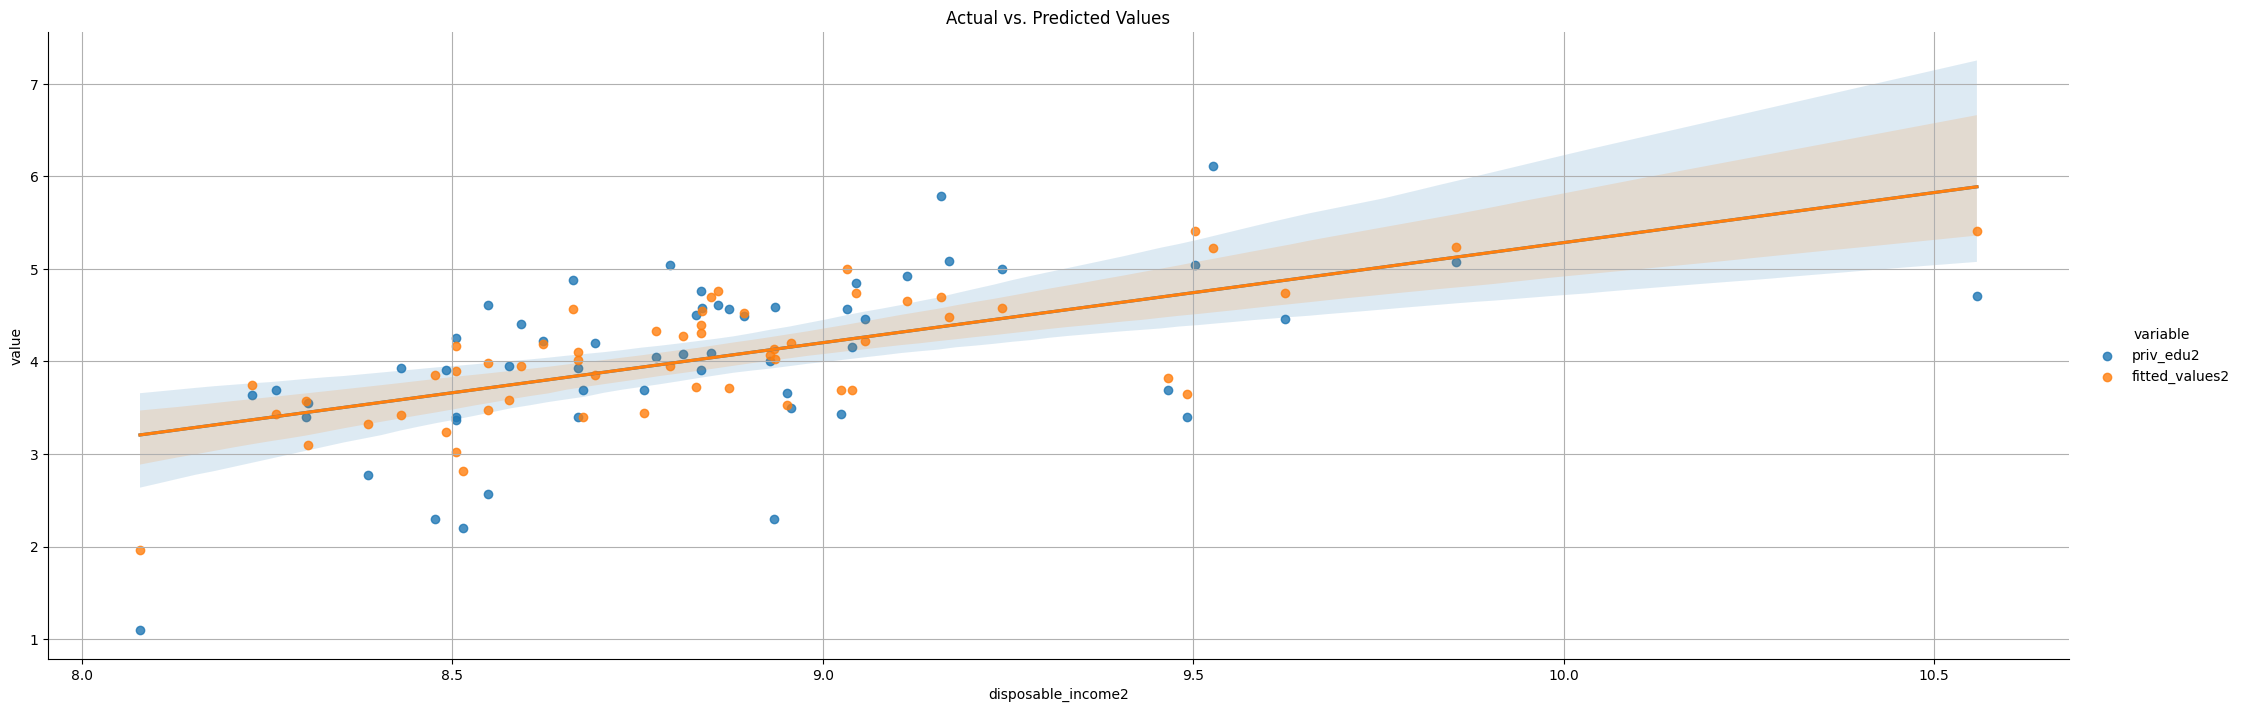

In [334]:
sb.lmplot(data=mdf2, x="disposable_income2", y="value", hue="variable", height=7, aspect=3)
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()
plt.show()
plt.close()

In [342]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LassoCV model to perform L1 regularization and automatically select the best alpha (regularization strength)
lasso_model = LassoCV(cv=5)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Get the coefficients of the selected features
selected_features = X.columns[lasso_model.coef_ != 0]

# Print the results
print("Selected features:", selected_features)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared on test set:", r2)

selected_data_set = X[selected_features]

# Fit the Lasso model on the entire dataset
lasso_model.fit(selected_data_set, y)

# Create a DataFrame for the results
lasso_result = pd.DataFrame({'Feature': selected_data_set.columns, 'Coefficient': lasso_model.coef_})

# Add intercept
lasso_result = pd.concat([lasso_result, pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [lasso_model.intercept_]})])

# Perform regression using statsmodels
X_with_intercept = sm.add_constant(selected_data_set)
ols_model = sm.OLS(y, X_with_intercept).fit()

# Print the summary of the OLS regression
ols_model.summary()


Selected features: Index(['entertainment', 'house_price', 'disposable_income'], dtype='object')
R-squared on test set: 0.2282615912223257


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     9.908
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           2.85e-05
Time:                        15:17:21   Log-Likelihood:                -60.043
No. Observations:                  56   AIC:                             128.1
Df Residuals:                      52   BIC:                             136.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.5383      2.080     -2.662      0.010      -9.713      -1.364
entertainment         0.0027      0.102      0.026      0.979      -0.201       0.207
house_price           0.2455      0.094      2.610      0.012       0.057       0.434
disposable_income     0.8060      0.258      3.119      0.003       0.287       1.325
==============================================================================
Omnibus:                        8.083   Durbin-Watson:                   2.570
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.260
Skew:                          -0.792   Prob(JB):                       0.0265
Kurtosis:                       3.775   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$\text{사교육비} \approx 0.00392 + 1.0027 \times \text{교양오락비} + 1.2786 \times \text{집 값} + 2.2388 \times \text{가처분소득}$$






In [344]:
    y_pred3 = lasso_model.predict(selected_data_set)

array([3.93921205, 4.04900955, 4.55196225, 2.92388536, 3.73536704,
       4.39213935, 5.3923026 , 3.93225739, 3.88961545, 4.35493135,
       4.43677258, 4.98732564, 4.60697576, 4.95273225, 3.89183942,
       4.07968376, 4.17321968, 4.26186254, 3.56947744, 4.05998767,
       3.76039213, 4.56019867, 3.62353787, 2.97270246, 3.81000986,
       4.55402545, 3.17175835, 3.76615623, 3.99878513, 4.18470419,
       4.93526983, 3.91071028, 4.42863932, 4.34875203, 3.93528983,
       4.00406375, 4.00740654, 4.31989097, 3.63019385, 4.01240606,
       3.3227821 , 4.16255412, 3.79163459, 3.91158141, 3.78232824,
       4.78014609, 4.31108941, 3.94748803, 4.40819473, 4.02259615,
       4.20531984, 3.85351414, 3.46593607, 3.69584568, 3.38766477,
       3.33028784])

In [345]:
rdf3 = DataFrame({'disposable_income3':xdf['disposable_income'],'priv_edu3' :xdf['priv_edu'],'fitted_values3': y_pred3})
mdf3 = melt(rdf3, id_vars=['disposable_income3'], value_vars=['priv_edu3', 'fitted_values3'])
print(mdf3)

     disposable_income3        variable     value
0              8.692490       priv_edu3  4.204693
1              8.934060       priv_edu3  2.302585
2              9.159468       priv_edu3  5.783825
3              8.514590       priv_edu3  2.197225
4              8.663369       priv_edu3  4.882802
..                  ...             ...       ...
107            8.547722  fitted_values3  3.853514
108            8.262301  fitted_values3  3.465936
109            8.430763  fitted_values3  3.695846
110            8.078378  fitted_values3  3.387665
111            8.505525  fitted_values3  3.330288

[112 rows x 3 columns]


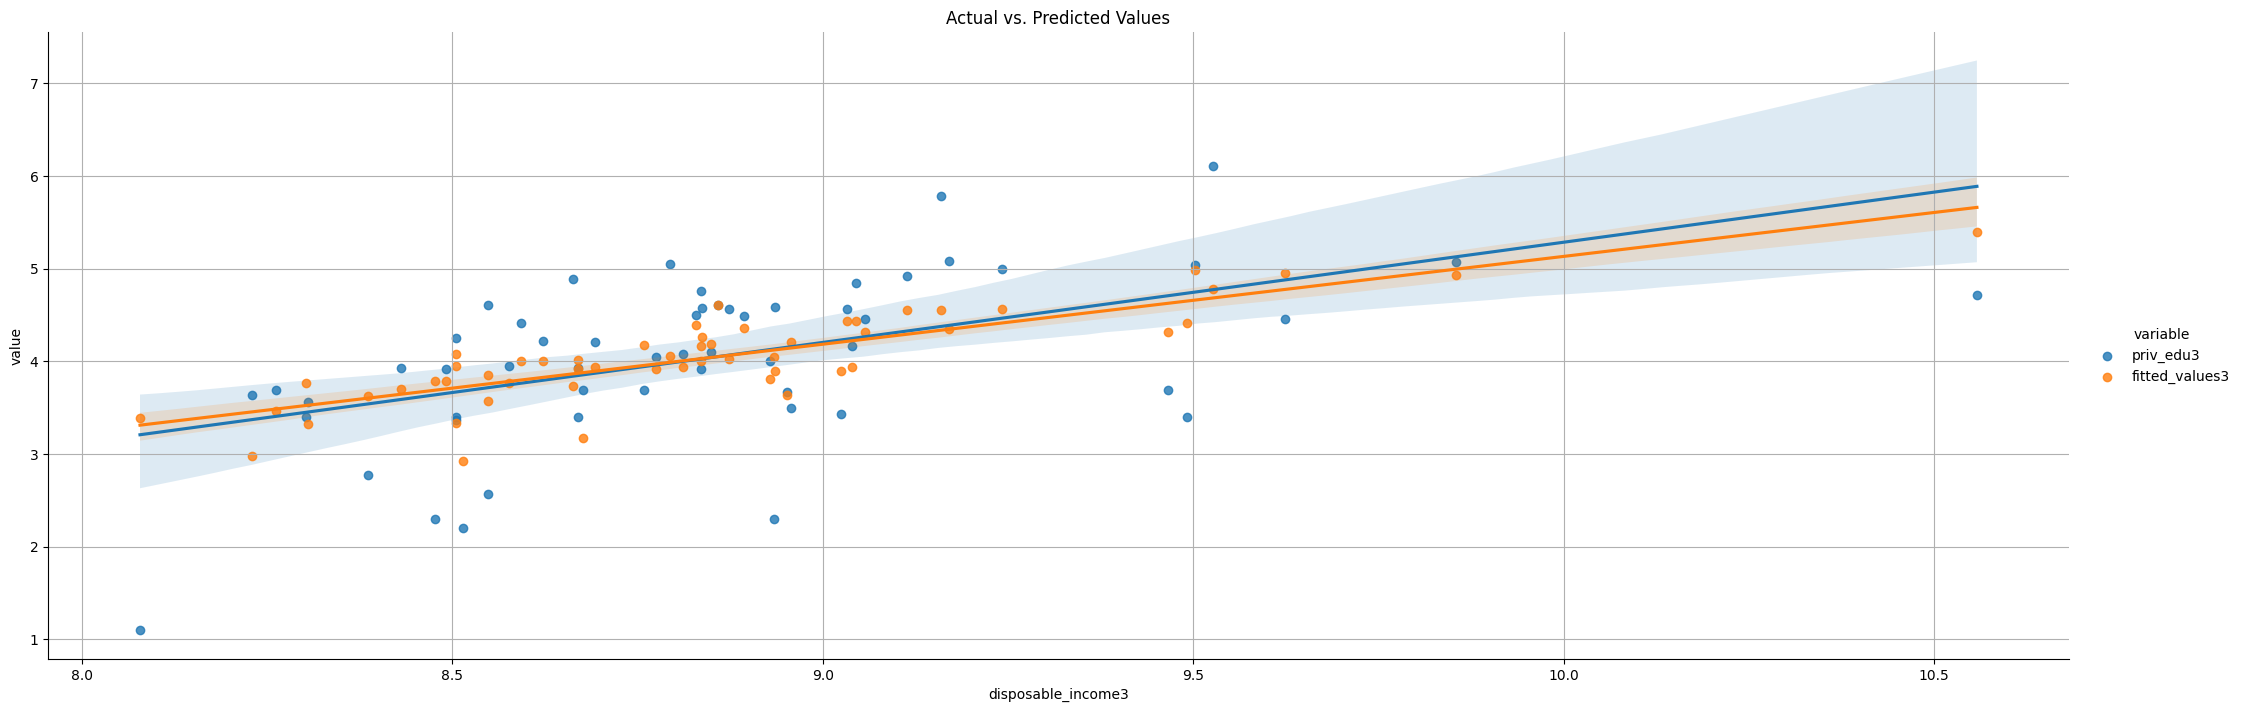

In [346]:
sb.lmplot(data=mdf3, x="disposable_income3", y="value", hue="variable", height=7, aspect=3)
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()
plt.show()
plt.close()

#### 주성분 분석 이용

In [ ]:
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 


In [ ]:
X= xdf.drop('priv_edu',axis=1)
y= xdf['priv_edu']

In [ ]:
model = pca(n_components=len(xdf.columns))
fit = model.fit_transform(X)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >[WARNING]: >Number of components can not be more then number of features. n_components is set to 22
[pca] >The PCA reduction is performed on the [23] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[22]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':            apparel     insurance  entertainment  transportation         phone  \
 PC1  -2.438562e-01 -3.076606e-01  -5.385810e-01   -2.191696e-01 -2.668538e-02   
 PC2  -2.968720e-02  6.959441e-01   2.353666e-01    1.598966e-01  1.099257e-01   
 PC3  -2.900914e-01 -4.315295e-01   6.713735e-01    2.140762e-01 -9.771788e-02   
 PC4   1.800640e-01  1.987656e-01  -9.540863e-02   -3.053163e-02  1.254293e-01   
 PC5   1.236831e-01 -7.947185e-02  -2.061619e-01    6.400570e-01  1.103458e-01   
 PC6  -2.456450e-01  3.286944e-01  -2.368811e-01    5.161739e-02 -2.382872e-01   
 PC7  -1.994638e-01 -1.102254e-01  -2.781001e-01    5.824901e-01  1.469010e-01   
 PC8   5.794382e-01 -2.063325e-01  -1.762730e-02   -1.948867e-02  2.061079e-01   
 PC9  -4.311231e-01 -5.084694e-03  -5.257458e-02   -2.947281e-02  1.768535e-01   
 PC10 -1.243824e-01  4.051013e-02  -4.594752e-02   -1.464216e-01 -3.012421e-01   
 PC11  7.181994e-02 -1.321045e-01  -3.747025e-02   -2.459050e-01  3.025129e-01   
 PC1

In [ ]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,house_price,-6.680266e-01,best
1,PC2,insurance,6.959441e-01,best
2,PC3,entertainment,6.713735e-01,best
3,PC4,general_sat_2,4.949949e-01,best
4,PC5,transportation,6.400570e-01,best
5,PC6,house_type_1,5.271479e-01,best
6,PC7,transportation,5.824901e-01,best
7,PC8,apparel,5.794382e-01,best
8,PC9,house_type_3,4.441940e-01,best
9,PC10,disposable_income,4.483283e-01,best


In [ ]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['residential_sat_1',
 'transportation',
 'insurance',
 'house_price',
 'house_type_1',
 'phone',
 'family_sat_1',
 'general_sat_2',
 'area_2',
 'meal_out',
 'residential_sat_3',
 'house_type_3',
 'disposable_income',
 'apparel',
 'residential_sat_2',
 'entertainment']

In [ ]:
ols = my_ols(xdf, 'priv_edu', feature)
ols.summary

['apparel', 'insurance', 'entertainment', 'transportation', 'phone', 'meal_out', 'utility_bills', 'priv_edu', 'house_price', 'disposable_income', 'area_1', 'area_2', 'house_type_1', 'house_type_2', 'house_type_3', 'residential_sat_1', 'residential_sat_2', 'residential_sat_3', 'family_sat_1', 'family_sat_2', 'family_sat_3', 'general_sat_1', 'general_sat_2', 'general_sat_3']


C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     2.969
Date:                Tue, 22 Aug 2023   Prob (F-statistic):            0.00305
Time:                        14:06:39   Log-Likelihood:                -51.751
No. Observations:                  56   AIC:                             135.5
Df Residuals:                      40   BIC:                             167.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.5540      2.004     -3.770      0.001     -11.603      -3.505
residential_sat_1    -2.6700      0.732     -3.646      0.001      -4.150      -1.190
transportation        0.0426      0.164      0.260      0.796      -0.289       0.374
insurance            -0.1271      0.115     -1.108      0.275      -0.359       0.105
house_price           0.2213      0.110      2.009      0.051      -0.001       0.444
house_type_1          0.1564      0.233      0.673      0.505      -0.314       0.626
phone                 0.0606      0.325      0.187      0.853      -0.596       0.717
family_sat_1         -0.6603      0.727     -0.908      0.369      -2.130       0.809
general_sat_2         0.0102      0.281      0.036      0.971      -0.559       0.579
area_2               -0.2414      0.215     -1.121      0.269      -0.677       0.194
meal_out              1.5071      0.553      2.723      0.010       0.389       2.626
residential_sat_3    -2.2123      0.653     -3.390      0.002      -3.531      -0.893
house_type_3          0.0448      0.505      0.089      0.930      -0.975       1.065
disposable_income     0.5761      0.355      1.622      0.113      -0.142       1.294
apparel              -0.1410      0.221     -0.639      0.527      -0.587       0.305
residential_sat_2    -2.6716      0.752     -3.553      0.001      -4.191      -1.152
entertainment        -0.0572      0.111     -0.515      0.610      -0.282       0.167
==============================================================================
Omnibus:                        2.964   Durbin-Watson:                   2.679
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.459
Skew:                          -0.513   Prob(JB):                        0.292
Kurtosis:                       3.029   Cond. No.                     1.23e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.13e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

사교육비 ≈ 0.00047345 + 0.068381 × residential_sat_1 + 1.0436 × transportation + 0.88077 × insurance
             + 1.2485 × house_price + 1.1696 × house_type_1 + 1.0626 × phone + 0.51665 × family_sat_1
             + 1.0102 × general_sat_2 + 0.78592 × area_2 + 4.5147 × meal_out + 0.1109 × residential_sat_3
             + 1.0463 × house_type_3 + 1.7803 × disposable_income + 0.8689 × apparel + 0.06849 × residential_sat_2
             + 0.94417 × entertainment
            
- 변수 설명:
    -  sat_1: 불만족, sat_2: 보통, sat_3: 만족
    - house_type_1: 일반 주택 거주, house_type_3: 복지 주택 거주
    - area_2: 비수도권 